# Snabbrapport inför nästa kampanjperiod

### Utifrån försäljningdata för första halvåret 2024 har vi följande rekommendationer:
- Fortsätt att satsa på kategorin Electronics och marknadsföra mot kunder i Stckholmsregionen. Det är här vi har våra största intäkter.
- Förbered kampanj inför mellandags och januarirea 2025, då vi hade fina försäljningssiffror i januari förra året. 

### Nyckeltal


In [1]:
# Laddning av data
import pandas as pd
import sys
import os
sys.path.append('...')

from src.io_utils import ladda_data
from src.metrics import calculate_aov

df = ladda_data('data/ecommerce_sales.csv')
aov = calculate_aov(df)
total_revenue = df["revenue"].sum()
total_units = len(df)

#print(f"Genomsnittligt ordervärde: {int(round(aov))} SEK")
#print(f"Total intäkt: {int(round(total_revenue))} SEK")
#print(f"Totalt antal sålda enheter:", len(df))

summary_data = [
    ["Genomsnittligt ordervärde (SEK)", int(round(aov))],
    ["Total intäkt (SEK)", int(round(total_revenue))],
    ["Totalt antal sålda enheter", total_units]]
summary_df = pd.DataFrame(summary_data, columns=["Nyckeltal", "Värde"])
summary_df






,Nyckeltal,Värde
0,Genomsnittligt ordervärde (SEK),1401
1,Total intäkt (SEK),3502767
2,Totalt antal sålda enheter,2500


### Topp 3 bäst säljande kategorier

In [2]:
import pandas as pd
 
df = ladda_data('data/ecommerce_sales.csv')
from src.metrics import get_top_3_categories, ladda_data
from src.io_utils import ladda_data
 
top3 = get_top_3_categories(df)
 
top3_df = pd.DataFrame(list(top3.items()), columns=['Kategori','revenue'])
top3_df['revenue'] = top3_df['revenue'].round(0).astype(int)
 
top3_df

,Kategori,revenue
0,Electronics,1364228
1,Sports,734653
2,Clothing,586745


### Intäkt per stad

['Stockholm', 'Malmö', 'Uppsala', 'Göteborg', 'Västerås']
The city with the highest total sales is Stockholm with total revenue of  1227201.94 SEK


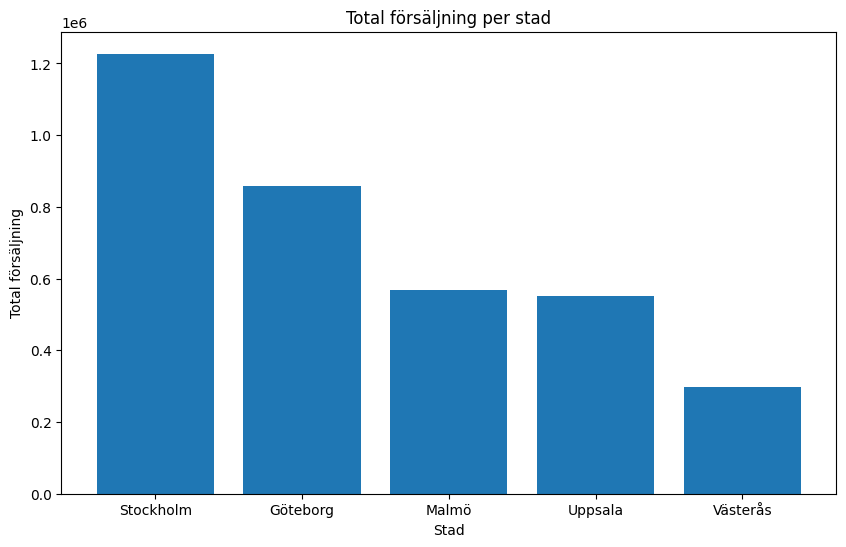

In [3]:
%run src/ecommerce.py


### Intäkt per kategori

In [4]:
import pandas as pd

from src.io_utils import ladda_data
from src.metrics import get_category_revenues 

df = ladda_data('data/ecommerce_sales.csv')
category_revenues = get_category_revenues(df)

category_df = pd.DataFrame(list(category_revenues.items()), columns=['Kategori', 'Intäkt'])
category_df["Intäkt"] = category_df["Intäkt"].round(0).astype(int)  #rundar av till heltal och konverterar till int
# https://stackoverflow.com/questions/49153253/pandas-rounding-when-converting-float-to-integer
category_df



,Kategori,Intäkt
0,Sports,734653
1,Clothing,586745
2,Home,511071
3,Electronics,1364228
4,Toys,143016
5,Beauty,163054


### Säsongsanalys

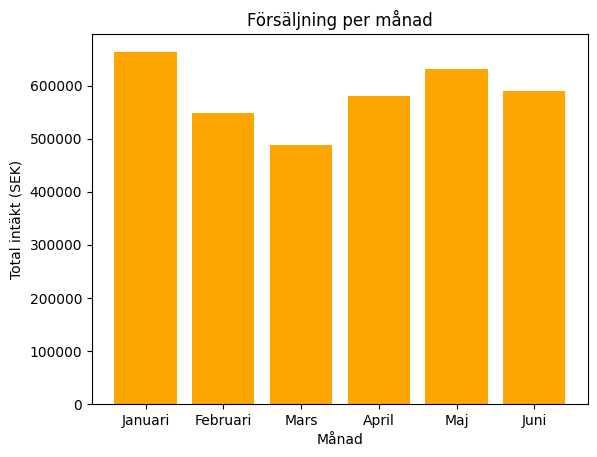

In [ ]:
# Histogram Seasons sales

def plot_sales_by_month(df):
    # month kolumn
    df["date"] = pd.to_datetime(df["date"])
    df["month"] = df["date"].dt.month
    
    # diagram
    månadsnamn = ["Januari","Februari","Mars","April","Maj","Juni"]
    sales_by_day = df.groupby("month")["revenue"].sum().head(6)

    plt.bar(månadsnamn, sales_by_day, color="orange")
    plt.title("Försäljning per månad")
    plt.xlabel("Månad")
    plt.ylabel("Total intäkt (SEK)")
    plt.show()

# kallar funktionen
plot_sales_by_month(df)

### Spridning av Ordervärden

In [6]:
# Spridning av ordervärden -- Old version
# print("Spridning:")
# print(f"Median: {df['revenue'].median():.2f} SEK")
# print(f"Standardavvikelse: {df['revenue'].std():.2f} SEK")
# print(f"Lägsta: {df['revenue'].min():.2f} SEK")
# print(f"Högsta: {df['revenue'].max():.2f} SEK")
# print(f"25%: {df['revenue'].quantile(0.25):.2f} SEK")
# print(f"75%: {df['revenue'].quantile(0.75):.2f} SEK")


## Spridning av ordervärden -- Dataframe Version

spridning_data = [
    ["Median (SEK)", round(df['revenue'].median(), 2)],
    ["Standardavvikelse (SEK)", round(df['revenue'].std(), 2)],
    ["Lägsta (SEK)", round(df['revenue'].min(), 2)],
    ["Högsta (SEK)", round(df['revenue'].max(), 2)],
    ["25% (SEK)", round(df['revenue'].quantile(0.25), 2)],
    ["75% (SEK)", round(df['revenue'].quantile(0.75), 2)],
]

spridning_df = pd.DataFrame(spridning_data, columns=["Statistik", "Värde"])
spridning_df

,Statistik,Värde
0,Median (SEK),1088.69
1,Standardavvikelse (SEK),1166.94
2,Lägsta (SEK),50.00
3,Högsta (SEK),9192.60
4,25% (SEK),577.96
5,75% (SEK),1884.75


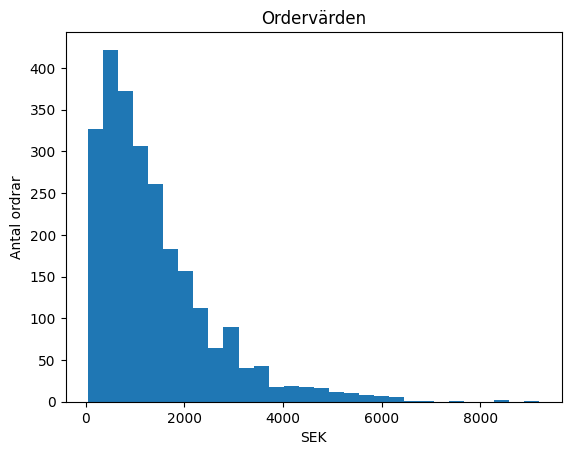

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['revenue'], bins=30)
plt.title('Ordervärden')
plt.xlabel('SEK')
plt.ylabel('Antal ordrar')
plt.show()

### Insikter
- Kunder handlar i genomsnitt för **1400 SEK** per order
- Majoriteten av ordrar ligger mellan **500 - 2500 SEK**
- Få kunder handlar för mycket höga eller låga belopp
- Electronics står för nästan 40% av intäkterna, medan Toys och Beauty enbart står för 4-5% vardera
- Stockholm är den geografiskt största marknaden, följt av Göteborg.
- Intäkterna var något högre i januari och maj än i övriga månader